# Dimension Reduction (차원 축소)

## PCA (Principal Component Analysis)
- Unsupervised Learning (비지도 학습): 변환시 클래스의 결정 값 불필요
- 주성분 (Principal Component)를 추출해 차원을 축소하는 기법
- 주성분 = 가장 높은 분산을 가지는 데이터의 축

In [112]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #2차원
X_pca = pca.fit_transform(X_scaled)
X_pca[:3]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=0)

#accuracy가 높다고 꼭 좋은건 아님 (과적합 문제)
print(cross_val_score(rf_clf, X_scaled, y, scoring='accuracy', cv=3))
print(cross_val_score(rf_clf, X_pca, y, scoring='accuracy', cv=3))

[0.98 0.94 0.98]
[0.88 0.88 0.9 ]


In [116]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


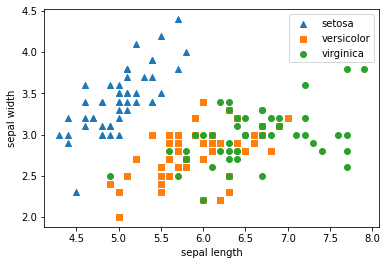

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

markers = ['^','s','o']
for i, marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [118]:
iris_df_pca = pd.DataFrame(X_pca, columns = ['pca1', 'pca2'])
iris_df_pca['target'] = iris.target
iris_df_pca[:3]

,pca1,pca2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


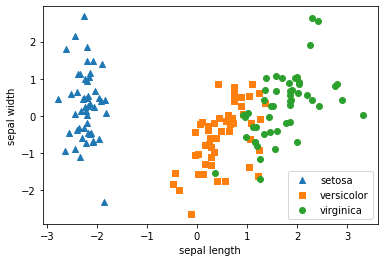

In [119]:
markers = ['^','s','o']
for i, marker in enumerate(markers):
    x = iris_df_pca[iris_df_pca['target'] == i]['pca1']
    y = iris_df_pca[iris_df_pca['target'] == i]['pca2']
    plt.scatter(x, y, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

결론: pca 변환 후 예측 성능은 떨어질 수 밖에 없다, 하지만 4개의 속성이 2개로 50% 감소한 것을 고려한다면 원본 데이터의 특성을 상당 부분 유지하고 있다

In [18]:
#실습
df = pd.read_excel('ml_data/default of credit card clients.xls', header=1, sheet_name="Data").iloc[:,1:]
df[:2]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [23]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
X_features = df.drop('default', axis=1, inplace=False)
y_target = df['default']
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<AxesSubplot:>

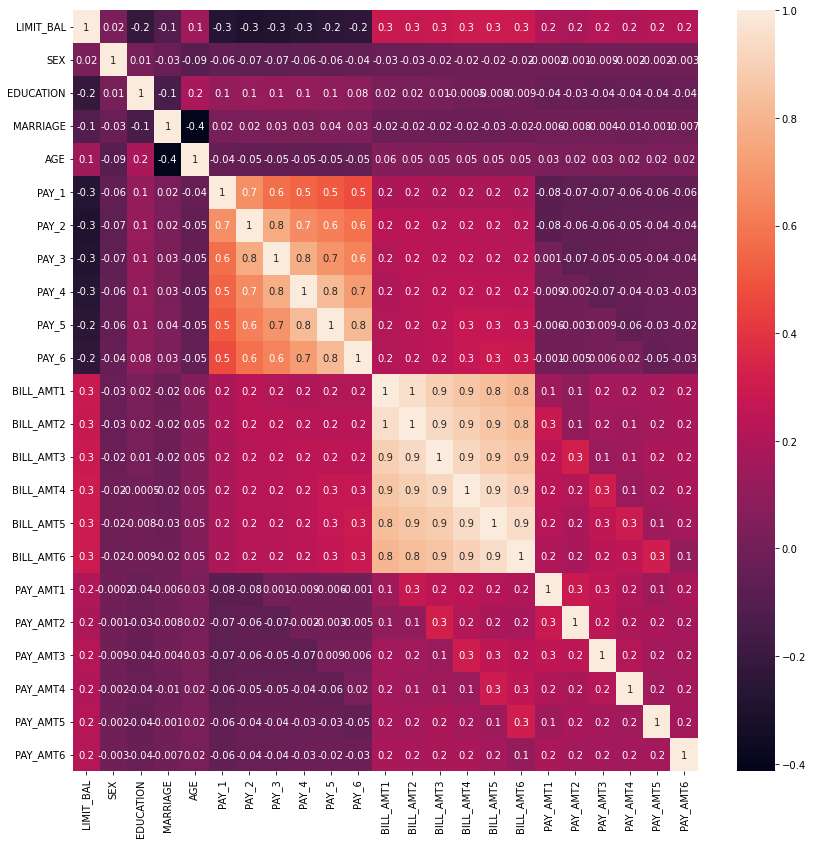

In [20]:
import seaborn as sns

plt.figure(figsize=(14,14))
sns.heatmap(X_features.corr(), annot=True, fmt='.1g')

heatmap을 통해 BILL_AMT1 ~ BILL_AMT6 까지의 상관도가 가장 높다는 걸 확인할 수 있다

In [40]:
df_b = df.iloc[:, [11,12,13,14,15,16,-1]]
df_b[:2]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default
0,3913,3102,689,0,0,0,1
1,2682,1725,2682,3272,3455,3261,1


In [62]:
from sklearn.model_selection import train_test_split

X = df_b.iloc[:,:-1]
y = df_b.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
from sklearn.preprocessing import StandardScaler
sclaer = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]])

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca[:2]

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401]])

In [65]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X_pca, y, scoring='accuracy', cv=5)
print('개별 정확도:', scores)
print('평균 정확도:', scores.mean())

개별 정확도: [0.77866667 0.77883333 0.77883333 0.77883333 0.77883333]
평균 정확도: 0.7788000000000002


## LDA (Linear Discriminant Analysis)
- PCA와 다르게 비지도학습이 아닌 지도학습이다
- 따라서 변환시에 클래스의 결정 값 필요

In [101]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [120]:
iris = load_iris()
X = iris.data
y = iris.target

In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
lda = LinearDiscriminantAnalysis(n_components=2) #2차원
iris_lda = lda.fit_transform(X_scaled, y)
iris_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

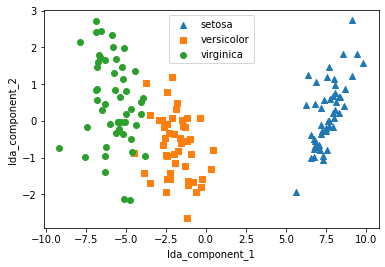

In [124]:
#dataframe으로 변환후 시각화
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris_df_lda = pd.DataFrame(iris_lda, columns = ['lda1', 'lda2'])
iris_df_lda['target'] = iris['target']

markers = ['^','s','o']
for i, marker in enumerate(markers):
    x = iris_df_lda[iris_df_lda['target'] == i]['lda1']
    y = iris_df_lda[iris_df_lda['target'] == i]['lda2']
    plt.scatter(x, y, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

결론: PCA로 변환된 데이터와 좌우 대칭 형태로 많이 닮아있다

## TruncatedSVD
- PCA와 유사한 행렬 분해 기법
- PCA와 다르게 정방행렬뿐만이 아닌 행과 열의 크기가 다른 행렬에도 고유벡터로 분해 할 수 있다

In [126]:
from sklearn.decomposition import TruncatedSVD

In [127]:
iris = load_iris()
X = iris.data
y = iris.target

In [128]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [129]:
tsvd = TruncatedSVD(n_components=2) #2차원
iris_tsvd = tsvd.fit_transform(X_scaled)
iris_tsvd

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

# Clustering (군집화)

## Kmeans
- 군집 중심정 설정
- 선택된 포인트의 평균 지점으로 이동
- 다시 가까운 포인트를 선택
- 반복

In [275]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [312]:
iris = load_iris()
X = iris.data
y = iris.target

In [313]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [314]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [315]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [316]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X_pca)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

### make_blobs

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


<AxesSubplot:>

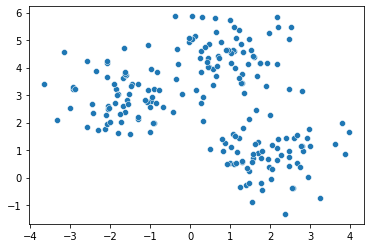

In [364]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(x = X[:,0], y = X[:,1])

In [365]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit(X)
kmeans.predict(X) #kmeans.labels_

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2])

In [366]:
y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

In [367]:
#실제 y값과 비교하기위해 y값을 바꾼다
y[y==2] = 10
y[y==1] = 2
y[y==10] = 1

In [368]:
y == kmeans.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### 군집 평가 (silhouette analysis)
-1 <= silhouette coefficient (실루엣 계수) <= 1 <br>
1에 가까울수록 근처의 군집과 더 멀리 떨어져 있다는 것, -값은 아예 다른 군집에 데이터 포인트가 할당됐다는 것

In [379]:
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris.data)

print(silhouette_samples(iris.data, kmeans.labels_))
print('평균 실루엣 계수 값:', silhouette_score(iris.data, kmeans.labels_))

[0.85295506 0.81549476 0.8293151  0.80501395 0.8493016  0.74828037
 0.82165093 0.85390505 0.75215011 0.825294   0.80310303 0.83591262
 0.81056389 0.74615046 0.70259371 0.64377156 0.77568391 0.85101831
 0.70685782 0.82030124 0.78418399 0.82590584 0.79297218 0.7941134
 0.77503635 0.79865509 0.83346695 0.84201773 0.84364429 0.81784646
 0.81518962 0.79899235 0.76272528 0.72224615 0.82877171 0.83224831
 0.79415322 0.84188954 0.76856774 0.85033231 0.84941579 0.63900017
 0.78657771 0.80023815 0.74698726 0.80977534 0.81340268 0.81902059
 0.8182324  0.85209835 0.02672203 0.38118643 0.05340075 0.59294381
 0.36885321 0.59221025 0.28232583 0.26525405 0.34419223 0.57829491
 0.37478707 0.58710354 0.55107857 0.48216686 0.56310057 0.32459291
 0.55751057 0.61072967 0.46149897 0.6115753  0.32909528 0.58968904
 0.31046301 0.49424779 0.5000461  0.38548959 0.12629433 0.11798213
 0.55293611 0.5069822  0.59466094 0.5607585  0.61972579 0.26087292
 0.54077013 0.41598629 0.16655431 0.48935747 0.60716023 0.61436

## Mean Shift (평균 이동)
- 중심을 데이터가 밀도가 가장 높은 곳으로 이동

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [56]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=0.7, random_state=0)

In [57]:
meanshift = MeanShift(bandwidth=1)
meanshift.fit(X)
meanshift.predict(X)
meanshift.labels_

array([2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0,
       1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0,
       1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2,
       1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 0], dtype=int64)

In [58]:
#최적화된 bandwidth 값 찾기
from sklearn.cluster import estimate_bandwidth

bandwith = estimate_bandwidth(X)
bandwith.round(3)

1.816

In [59]:
X, y  = make_blobs(n_samples=200, n_features= 2,  cluster_std=.7, random_state=0)
meanshift = MeanShift(bandwidth=1.816)
meanshift.fit(X)
y_pred = meanshift.predict(X)
print(y_pred)
print(y)

[2 0 0 2 0 2 1 1 0 2 0 2 0 0 0 2 1 1 0 2 2 1 0 0 2 0 1 2 2 2 0 0 2 0 1 1 0
 1 1 2 1 2 2 2 0 0 0 2 0 0 0 1 2 2 2 2 1 1 0 0 2 2 0 1 1 2 1 1 2 1 1 0 0 2
 0 2 1 1 1 2 2 0 0 1 1 0 0 2 0 1 2 2 1 0 1 0 0 2 2 1 1 0 2 0 2 0 1 0 0 1 0
 2 1 2 0 0 0 1 2 2 1 1 2 0 1 0 2 1 2 0 2 1 1 1 0 1 1 0 1 2 2 2 0 1 1 0 2 2
 1 0 1 2 2 2 0 1 1 1 0 0 2 2 2 2 0 0 1 2 1 1 0 1 0 1 2 2 0 2 0 1 0 2 1 1 1
 0 2 1 0 0 2 2 1 1 1 1 2 1 0 1]
[2 0 0 2 0 2 1 1 0 2 0 2 0 0 0 2 1 1 0 2 2 1 0 0 2 0 1 2 2 2 0 0 2 0 1 1 0
 1 1 2 1 2 2 2 0 0 0 2 0 0 0 1 2 2 2 2 1 1 0 0 2 2 0 1 1 2 1 1 2 1 1 0 0 2
 0 2 1 1 1 2 2 0 0 1 1 0 0 2 0 1 2 2 1 0 1 0 0 2 2 1 1 0 2 0 2 0 1 0 0 1 0
 2 1 2 0 0 0 1 2 2 1 1 2 0 1 0 2 1 2 0 2 1 1 1 0 1 1 0 1 2 2 2 0 1 1 0 2 2
 1 0 1 2 2 2 0 1 1 1 0 0 2 2 2 2 0 0 1 2 1 1 0 1 0 1 2 2 0 2 0 1 0 2 1 1 1
 0 2 1 0 0 2 2 1 1 1 1 2 1 0 1]


In [60]:
y == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## GMM
- 가우시안 분포 (정규 분포)

In [66]:
from sklearn.mixture import GaussianMixture

In [67]:
iris = load_iris()
X = iris.data
y = iris.target

In [76]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)
gmm_cluster_labels = gmm.predict(X)
gmm_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## DBSCAN
- 밀도 기반

In [78]:
from sklearn.cluster import DBSCAN

In [100]:
dbscan = DBSCAN(eps = 0.6, min_samples=8, metric='euclidean')
dbscan.fit_predict(iris.data)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

### make_circles

In [102]:
from sklearn.datasets import make_circles

In [108]:
X, y = make_circles(n_samples=1000, noise=0.05, random_state=0, factor=0.5)

In [110]:
print(X.shape, y.shape)

(1000, 2) (1000,)


<AxesSubplot:>

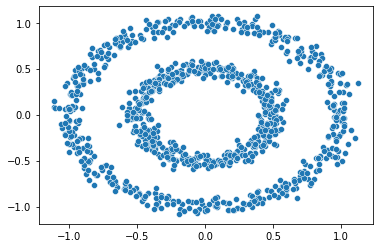

In [88]:
import seaborn as sns
sns.scatterplot(X[:,0],X[:,1])

<AxesSubplot:>

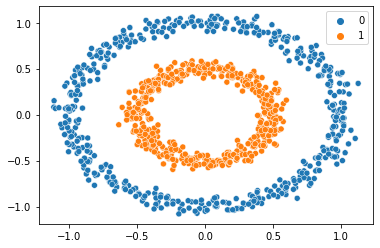

In [127]:
import pandas as pd

df = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
df['target'] = y

sns.scatterplot(data = df, x = X[:,0], y = X[:,1], hue = y)

In [142]:
#make_circles() 데이터 세트 kmeans와 dbscan 비교하기

<AxesSubplot:>

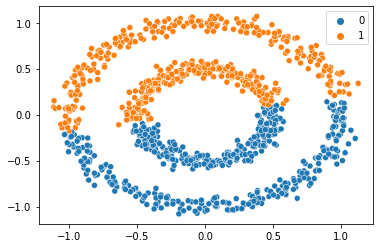

In [143]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
y_pred = kmean.fit_predict(X)
df['labels'] = y_pred
sns.scatterplot(data = df, x = X[:,0], y = X[:,1], hue = y_pred)

<AxesSubplot:>

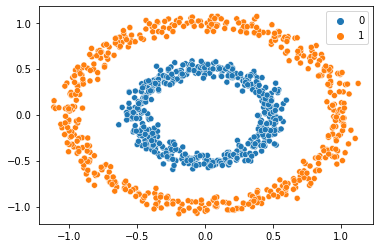

In [144]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
y_pred = dbscan.fit_predict(X)
df['labels'] = y_pred
sns.scatterplot(data = df, x = X[:,0], y = X[:,1], hue = y_pred)

결론: 원 형태의 분포를 가진 데이터 세트를 군집화 할 경우, DBSCAN 이 적합하다